<a href="https://colab.research.google.com/github/lucaspn017/sales_time_series/blob/main/Superstore_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema**: Analisar os dados de vendas de um Supermercado.
> Encontrar comportamento sazonais nas vendas, com o objetivo de realizar análises preditivas.

> Verificar o comportamento da curva de consumo para diferentes períodos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/superstore-dataset-final


In [3]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1"
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv(f"{path}/Sample - Superstore.csv", encoding="latin1")

In [4]:
superstore_df = pd.DataFrame(df)
display(superstore_df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **1° Passo: Limpeza e pré-processamento dos dados.**
> Formatação de células NaN.

> Verificação de dados duplicados.

> Identificar o datatype dos dados e realizar modificações necessárias.

In [5]:
superstore_df.info()
superstore_df.isnull().sum()
superstore_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

np.int64(0)

#**2° Passo: Verificar o comportamento do número de pedidos**

> Encontrar comportamentos sazonais.

> Prever para novos anos.

> Utilizar os dados posteriores como comparativo.

In [31]:
OrdersDate = superstore_df.groupby('Order Date')['Order ID'].count().reset_index()
OrdersDate['Order Date'] = pd.to_datetime(OrdersDate['Order Date'])
OrdersDate = OrdersDate.sort_values(by='Order Date', ascending= True)
dfByYear = {}
for ano in OrdersDate[ 'Order Date'].dt.year.unique():                                                   # Aqui, decidi criar sublistas, com cada uma delas representando
  dfByYear[f'df_ano{ano}'] = pd.DataFrame(OrdersDate[OrdersDate['Order Date'].dt.year == ano])           # os dados de consumo para cada um dos anos, justificando a utiliza-
  dfByYear[f'df_ano{ano}'] = dfByYear[f'df_ano{ano}'].rename(columns = {'Order ID':'Orders Quantity'})   # ção do 'unique'.

dfByYear['df_ano2014']

,Order Date,Orders Quantity
55,2014-01-03,1
66,2014-01-04,3
69,2014-01-05,1
72,2014-01-06,9
75,2014-01-07,2
...,...,...
380,2014-12-27,16
384,2014-12-28,6
387,2014-12-29,16
395,2014-12-30,13


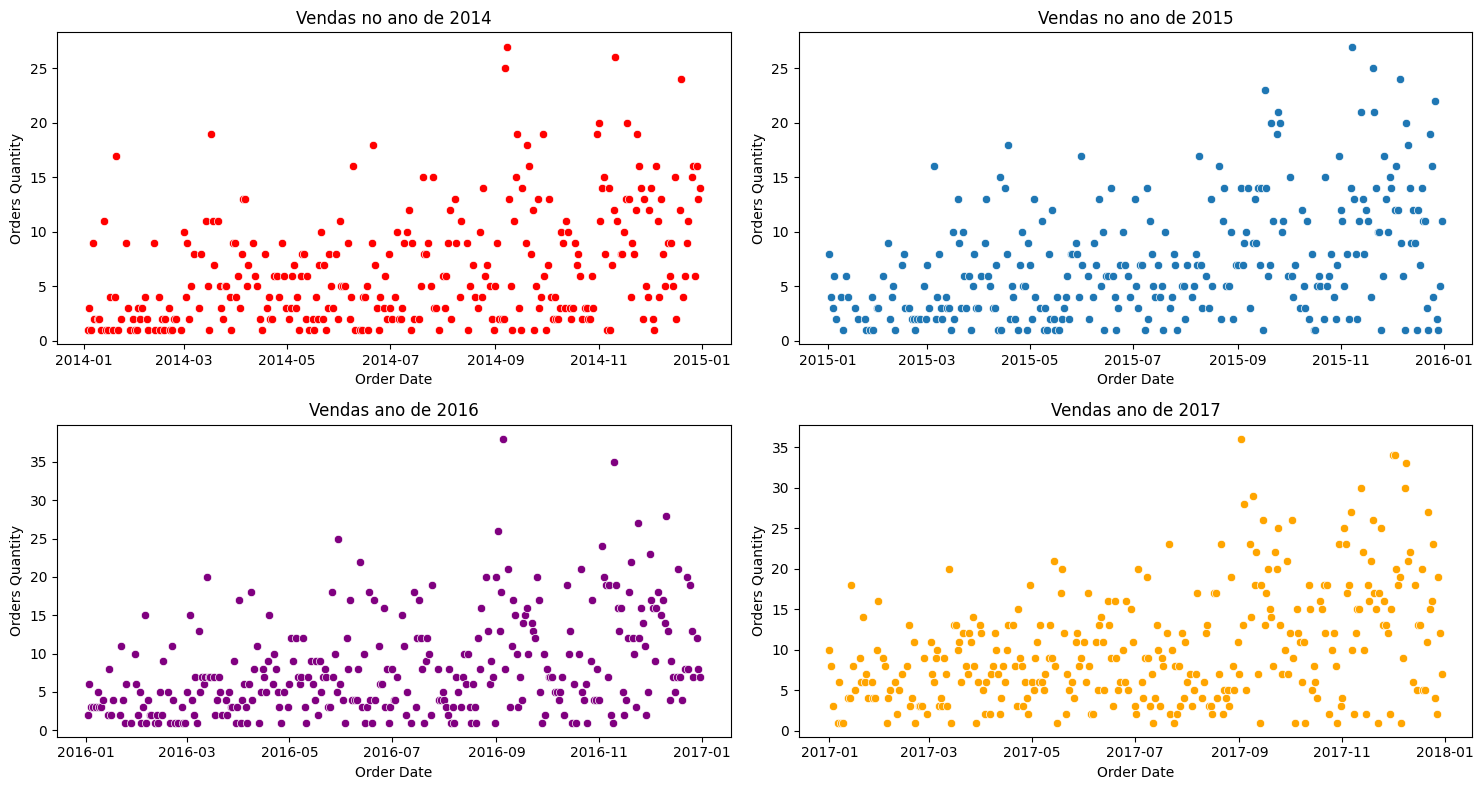

In [7]:
fig, axes= plt.subplots(nrows=2, ncols = 2, figsize=(15,8))

sns.scatterplot(data = dfByYear['df_ano2014'], x='Order Date', y='Orders Quantity', ax=axes[0,0], color = 'red')
axes[0,0].set_title('Vendas no ano de 2014')

sns.scatterplot(data = dfByYear['df_ano2015'], x='Order Date', y='Orders Quantity', ax=axes[0,1])
axes[0,1].set_title("Vendas no ano de 2015")

sns.scatterplot(data = dfByYear['df_ano2016'], x='Order Date', y='Orders Quantity', ax=axes[1,0], color = 'purple')
axes[1,0].set_title("Vendas ano de 2016")

sns.scatterplot(data = dfByYear['df_ano2017'], x='Order Date', y='Orders Quantity', ax=axes[1,1], color = 'orange')
axes[1,1].set_title("Vendas ano de 2017")

plt.tight_layout()
plt.show()

## Tornar a sazonalidade mais visível.

> Nos dados acima, é possível verificar um comportamento crescente das vendas ao longo do ano.

> Perceba que existem três picos: O primeiro se iniciando nos primeiros meses do ano. O segundo ocorrendo no mês 7; o terceiro no mês 9 e o último, ao final do ano.

> Cada pico vai se tornando maior em relação ao anterior.

<Axes: xlabel='Order Date', ylabel='Orders Quantity'>

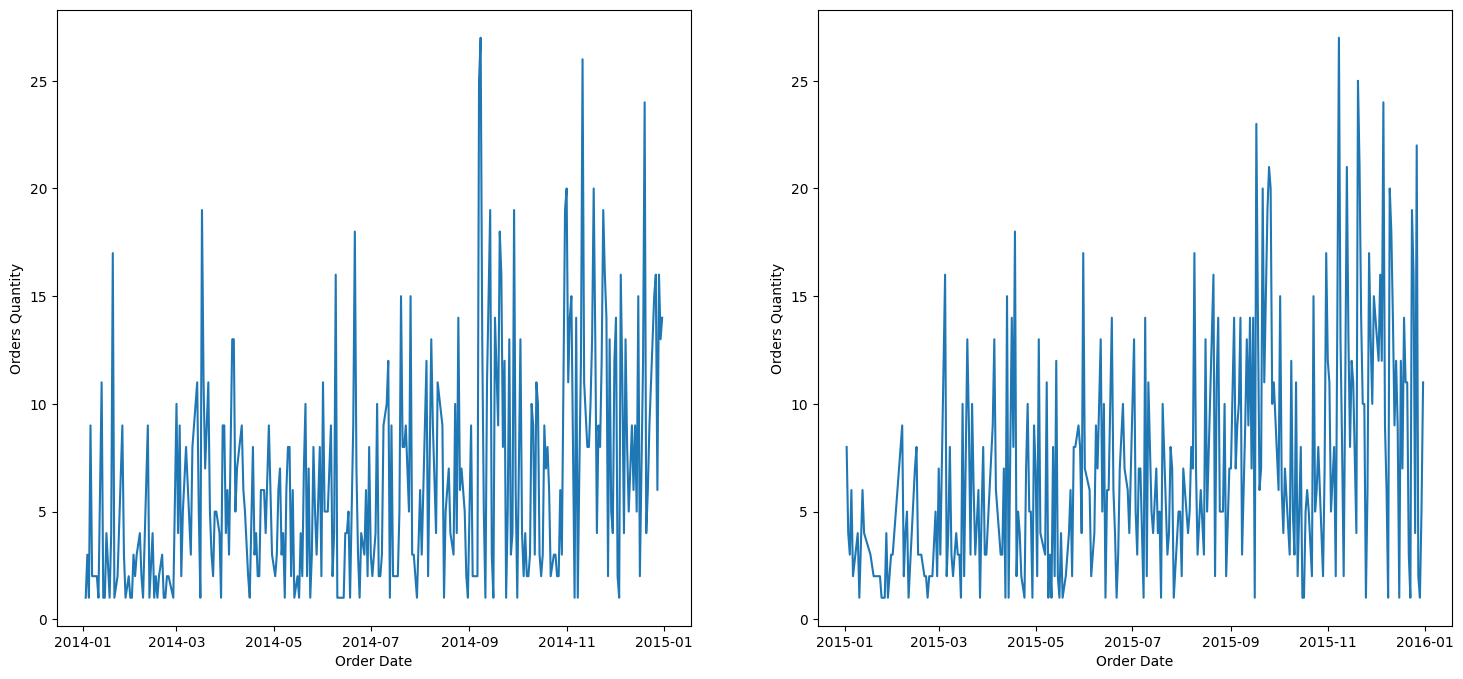

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

dfByMonth2014 = dfByYear['df_ano2014'].copy()
dfByMonth2014['month'] = dfByMonth2014['Order Date'].dt.to_period('M')

dfByMonth2015 = dfByYear['df_ano2015'].copy()
dfByMonth2015['month'] = dfByMonth2015['Order Date'].dt.to_period('M')

sns.lineplot(data = dfByYear['df_ano2014'], x='Order Date', y='Orders Quantity', ax=axes[0])
sns.lineplot(data = dfByYear['df_ano2015'], x='Order Date', y='Orders Quantity', ax=axes[1])

## Verificar o gráfico de barras.

* Abaixo, decidi agrupar os dados por mês, de forma a tornar mais incidente o comportamentos periódico das vendas, organizando o conjunto a partir de sua soma.

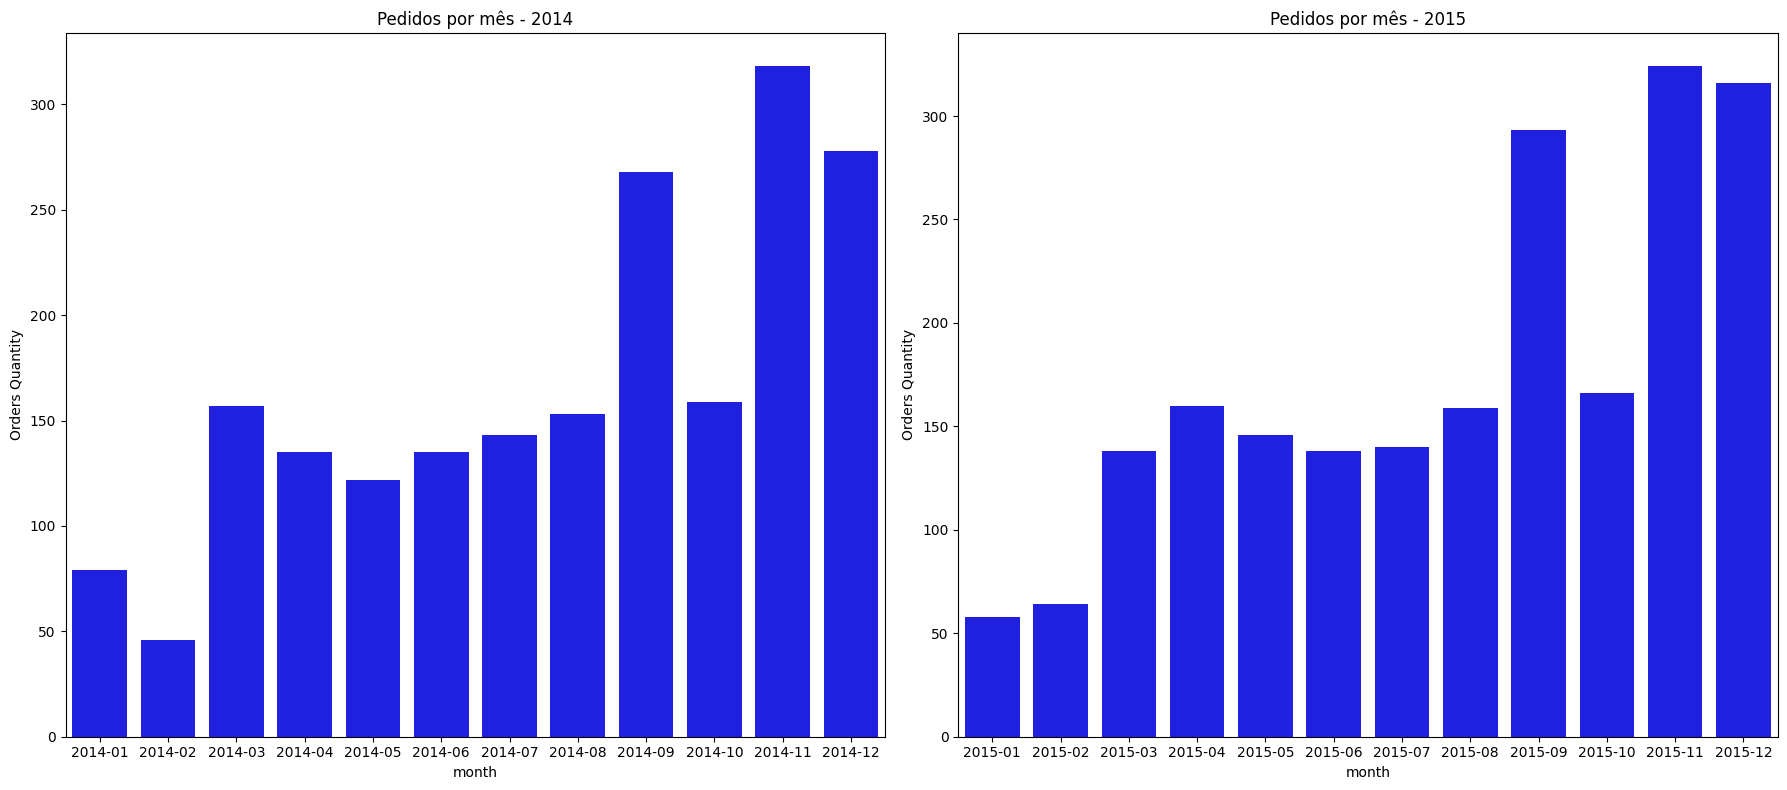

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

dfGroupMonth2014 = dfByMonth2014.groupby("month")["Orders Quantity"].sum().reset_index()
dfGroupMonth2015 = dfByMonth2015.groupby("month")['Orders Quantity'].sum().reset_index()

sns.barplot(data=dfGroupMonth2014, x="month", y="Orders Quantity", ax=axes[0], color="blue")
sns.barplot(data=dfGroupMonth2015, x="month", y="Orders Quantity", ax=axes[1], color="blue")

axes[0].set_title("Pedidos por mês - 2014")
axes[1].set_title("Pedidos por mês - 2015")

plt.tight_layout()
plt.show()

## Perceba como o comportamento sazonal anual se mostra mais evidente no gráfico anterior.

## Unindo os dois comportamentos, temos:

<Axes: xlabel='month', ylabel='Orders Quantity'>

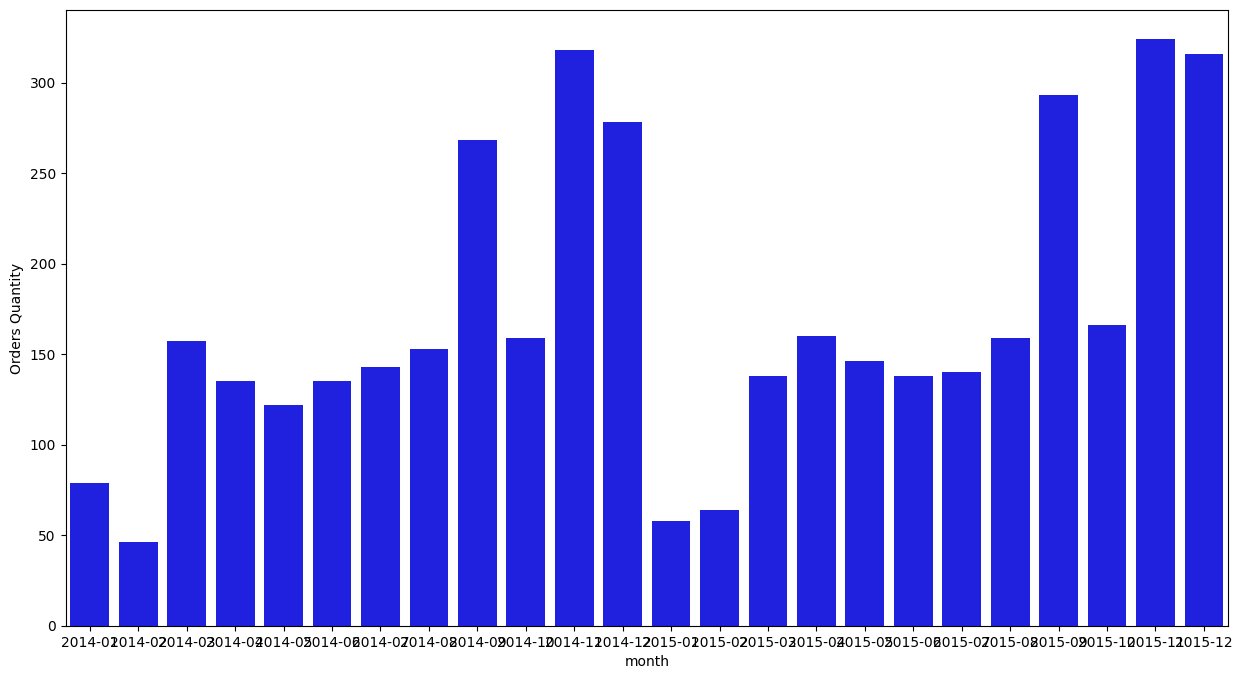

In [35]:
plt.figure(figsize=(15,8))

dfBy2Years = pd.concat([dfGroupMonth2014, dfGroupMonth2015])

sns.barplot(data=dfBy2Years, x='month', y='Orders Quantity', color='blue')

# **3° Passo: Criar modelo preditivo**

In [11]:
from prophet import Prophet

# Preparar os dados
df_prophet = dfBy2Years[['Order Date', 'Orders Quantity']].rename(columns={'Order Date':'ds', 'Orders Quantity':'y'})
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2014-01-03,1
1,2014-01-04,3
2,2014-01-05,1
3,2014-01-06,9
4,2014-01-07,2
...,...,...
590,2015-12-27,22
591,2015-12-28,2
592,2015-12-29,1
593,2015-12-30,5


In [12]:
np.random.seed(4587)
# Corrigir coluna 'ds' para formato datetime (timestamp)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/m89to_ry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/5nn113sk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14026', 'data', 'file=/tmp/tmp4k0f5b87/m89to_ry.json', 'init=/tmp/tmp4k0f5b87/5nn113sk.json', 'output', 'file=/tmp/tmp4k0f5b87/prophet_modelhzpt7e7l/prophet_model-20250617112856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# No gráfico abaixo, temos três detalhes importantes.

* A curva em azul representa os dados preditos pelo modelo, chamados de yhat.

* A curva em azul claro representa os valores máximo e mínimo da predição, isto é, um intervalo de confiança.

* Os pontos dados representam os valores reais dos dados

> Perceba que no modelo temos alguns outliers no limite superior. Já no limite inferior, a quantidade diminui.

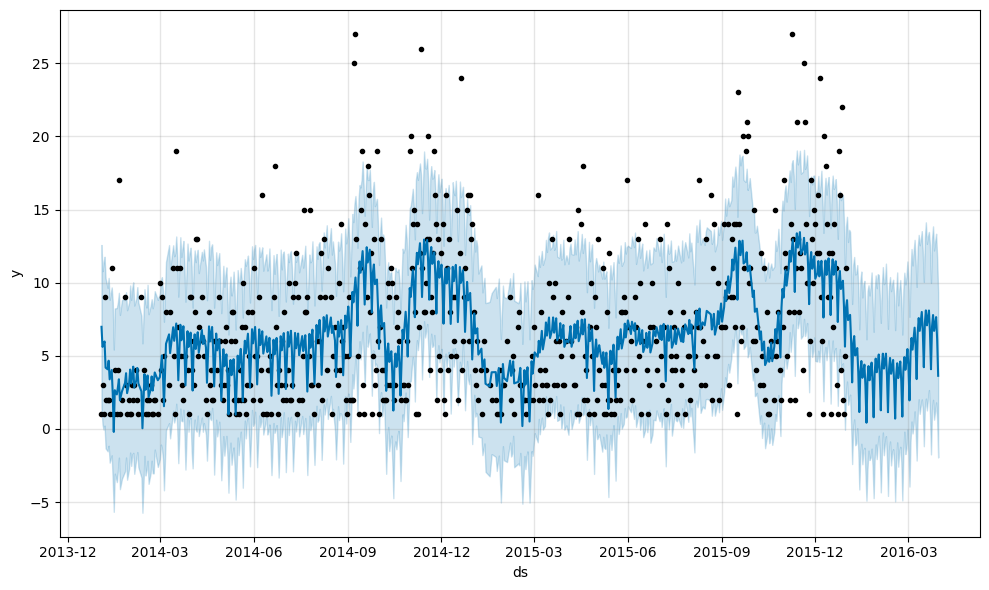

In [13]:
fig1 = modelo.plot(previsao)

# **4° Passo: Verificar os dados do modelo predito, assim como seus componentes**

>

In [14]:
previsao[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-03,6.982774,1.457443,12.575614
1,2014-01-04,5.610484,0.302291,10.786928
2,2014-01-05,5.754637,-0.040966,11.361916
3,2014-01-06,5.980825,0.232155,11.772750
4,2014-01-07,4.193370,-1.323202,10.299655
...,...,...,...,...
680,2016-03-26,6.703003,0.634260,12.199172
681,2016-03-27,7.134500,1.191192,12.808591
682,2016-03-28,7.645450,1.817172,13.343705
683,2016-03-29,6.138642,0.639504,11.732420


# Note a **tendência de crescimento** no comportamento das vendas ao longo do mês.

# Também é possível perceber no gráfico do meio que há uma contribuição negativa da sazonalidade, para as vendas de quarta-feira.

>> Isto é, nesse dia, o comportamento do consumo está abaixo da média semanal.

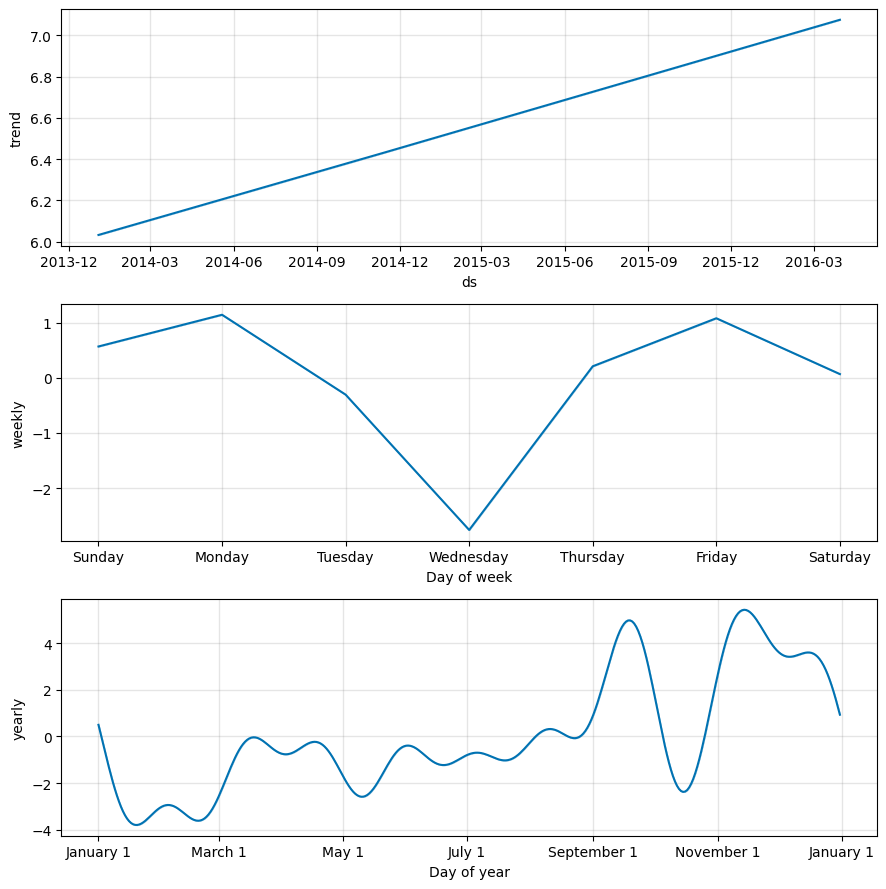

In [15]:
fig2 = modelo.plot_components(previsao)

#**5° Passo: Verificar a precisão dos modelos para novos pontos.**

In [16]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:500]
df_treino['y'] = df_prophet['y'][:500]

df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][500:]
df_teste['y'] = df_prophet['y'][500:]

In [17]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods = 90, freq='D')

previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/iygrv_7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/fkp9tink.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10496', 'data', 'file=/tmp/tmp4k0f5b87/iygrv_7x.json', 'init=/tmp/tmp4k0f5b87/fkp9tink.json', 'output', 'file=/tmp/tmp4k0f5b87/prophet_modelauurdhu4/prophet_model-20250617112857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


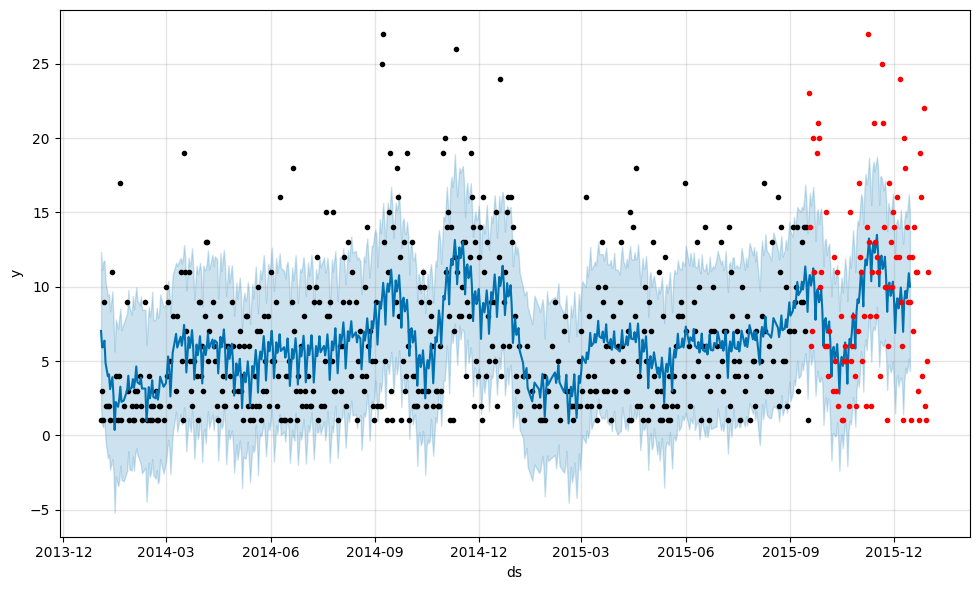

In [18]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

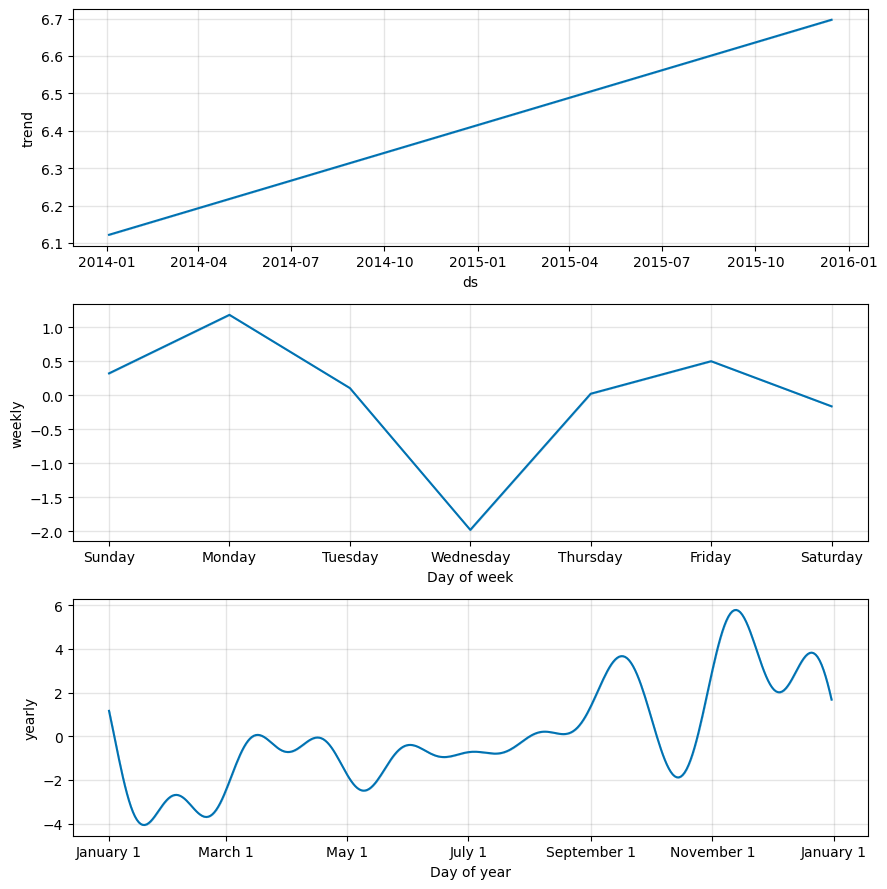

In [19]:
fig2= modelo.plot_components(previsao)

#**6° Passo: Eliminar os outliers e criar um novo modelo.**
> Há uma contribuição negativa dos outliers para a predição correta dos novos pontos.

> O cálculo do erro médio quadrático se mostra útil, pois ele potencializa a contribuição dos dados discrepantes, tornando sua contribuição mais evidente.

> Com base nisso, o efeito comparativo entre a base ajustada e a antiga será mais evidente.

In [37]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2015-03-07,4.430137,4
1,2015-03-08,5.236841,8
2,2015-03-09,6.570262,3
3,2015-03-10,6.177586,2
4,2015-03-12,3.826212,4
...,...,...,...
200,2015-12-23,4.733557,1
201,2015-12-25,7.353595,16
202,2015-12-26,5.117404,4
203,2015-12-30,3.862060,5


In [21]:
>from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse:.3f}\nRMSE:{rmse:.3f}')

MSE:33.069
RMSE:5.751


## Retirar os outliers com o objetivo de diminuir o RMS.

In [22]:
np.random.seed(448)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/zk89shh0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/zi2_ypoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26052', 'data', 'file=/tmp/tmp4k0f5b87/zk89shh0.json', 'init=/tmp/tmp4k0f5b87/zi2_ypoc.json', 'output', 'file=/tmp/tmp4k0f5b87/prophet_modelqkhjvb33/prophet_model-20250617112859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
print(f'df_prophet:{len(df_prophet)}\nprevisao:{len(previsao)}')

df_prophet:595
previsao:595


In [24]:
noOutlier = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [25]:
df_treino= pd.DataFrame()
df_teste = pd.DataFrame()

df_treino['ds'] = noOutlier['ds'][:300]
df_treino['y'] = noOutlier['y'][:300]

df_teste['ds'] = noOutlier['ds'][300:]
df_teste['y'] = noOutlier['y'][300:]

In [26]:
np.random.seed(4587)

noOutliersMod = Prophet(yearly_seasonality=True)
noOutliersMod.fit(df_treino)
futuro = noOutliersMod.make_future_dataframe(periods=365, freq='D')
previsao = noOutliersMod.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/jj5uym75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4k0f5b87/r93qa7y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92324', 'data', 'file=/tmp/tmp4k0f5b87/jj5uym75.json', 'init=/tmp/tmp4k0f5b87/r93qa7y5.json', 'output', 'file=/tmp/tmp4k0f5b87/prophet_modellmnuagg7/prophet_model-20250617112859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:28:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


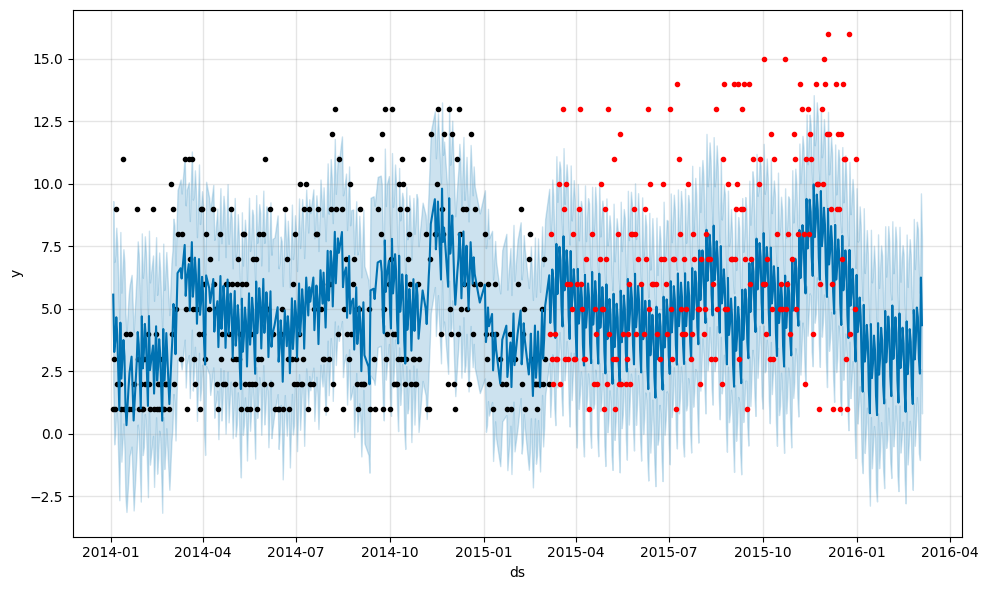

In [27]:
fig1 = noOutliersMod.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'],'.r')

## Verificar o novo RMSE sem os outliers.

In [28]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

df_comparacao

,ds,yhat,y
0,2015-03-07,4.430137,4
1,2015-03-08,5.236841,8
2,2015-03-09,6.570262,3
3,2015-03-10,6.177586,2
4,2015-03-12,3.826212,4
...,...,...,...
200,2015-12-23,4.733557,1
201,2015-12-25,7.353595,16
202,2015-12-26,5.117404,4
203,2015-12-30,3.862060,5


In [29]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'RMSE: {mse:.4f}\nRMSE: {rmse:.4f}')

RMSE: 17.2093
RMSE: 4.1484


In [30]:
from prophet.plot import plot_plotly
fig = plot_plotly(noOutliersMod, previsao)
fig.show()

# **Conclusões**

> A partir da retirada dos outliers foi possível criar um modelo com melhor precisão.

> Na detecção da sazonalidade, foi possível perceber que há picos de vendas que se tornam cada vez maiores a cada três meses. Com base nisso, seria interessante investir em campanhas de marketing nesses intervalos onde as vendas possuem relativas quedas.

> Durante a quarta-feira, o consumo cai de forma expressiva em relação aos outros dias da semana. Diante disso e com o objetivo de melhorar as vendas, as campanhas de marketing devem se concentrar mais durante esse dia.